# Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX

## Project Breakdown
- Task 1: Introduction
- Task 2: Exploratory Data Analysis and Preprocessing
- Task 3: Word2Vec with Gensim
- Task 4: Exploring Results (you are here)
- Task 5: Building and Visualizing Interactive Network Graph

## Task 4: Exploring Results

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.word2vec import Word2Vec
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [2]:
model = Word2Vec.load('Data/w2v.model')

In [3]:
model.wv.most_similar(['orange'], topn = 2)

[('tangerine', 0.8896805047988892), ('lemon', 0.8383854031562805)]

In [4]:
with open('Data/items_for_sale.txt', 'r') as f:
    items_for_sale = f.read().split('\n')

In [6]:
items_for_sale[:4]

['salt', 'pepper', 'fresh', 'oil']

In [7]:
words, vectors = [], []
for item in items_for_sale:
    try:
        vectors.append(model.wv.get_vector(item))
        words.append(item)
    except KeyError:
        print(f'Words {item} not found in vocab -- panic')

In [8]:
vectors[0]

array([-0.2766624 ,  0.6256059 , -2.7340958 , -2.3550196 ,  0.41474858,
        0.904628  , -1.0524501 ,  0.6772384 ,  2.403041  , -1.0792685 ,
        1.5810009 , -2.0448794 , -0.06951454,  3.1653287 , -0.01144837,
       -0.45539576, -3.863505  ,  2.3546622 , -1.0747292 ,  0.4079531 ,
       -4.3905897 ,  3.8853443 , -2.378075  ,  3.753136  ,  0.752287  ,
       -0.02087749, -1.2941171 ,  1.6221439 ,  0.02238441,  3.7258065 ,
       -1.4087356 , -2.460521  ,  2.7007418 ,  3.3116353 , -3.4558113 ,
       -0.49687025, -1.092684  , -0.22163415, -0.65104383, -1.7542171 ,
        1.8697807 , -0.7882977 ,  0.32479745,  3.0458016 ,  3.6826077 ,
       -0.51688266,  1.4152583 , -1.2815951 , -0.14427046,  2.5611026 ,
       -0.4850931 ,  2.3935387 , -0.33196586,  0.5343826 ,  0.4545026 ,
       -2.7894976 ,  2.4731638 , -0.834589  , -1.6198214 , -1.9184576 ,
       -0.37615454, -0.96498   , -1.6492265 ,  2.2146308 , -1.6458557 ,
       -6.813682  ,  4.0804224 , -1.5197879 , -1.6550337 ,  0.18

In [9]:
sims = cosine_similarity(vectors, vectors)

In [12]:
sims.shape

(911, 911)

In [21]:
for i in range(len(vectors)):
    for j in range(len(vectors)):
        if i<= j:
            sims[i, j] = False

In [16]:
k = 15
indices = list(range(len(vectors)))

In [17]:
random.shuffle(indices)

In [18]:
indices= indices[:k]

In [19]:
small_vectors = [vectors[i] for i in indices]
small_words = [words[i] for i in indices]

In [20]:
small_sims = cosine_similarity(small_vectors, small_vectors)

In [23]:
for x in range(len(small_vectors)):
    small_sims[x, x] = 0

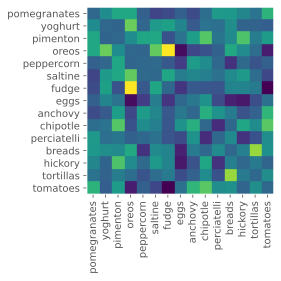

In [24]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()